<a href="https://colab.research.google.com/github/HugoFrajacomo/AprendizagemDeMaquina/blob/main/Prova2_Hugo_Vinhos_Tintos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Idealização do estudo

O presente estudo tem como objetivo principal analisar as características dos vinhos tintos e compreender sua distribuição através de visualizações. Para isso, serão realizadas as seguintes etapas:


*   Categorização de vinhos: Será desenvolvida uma classificação dos vinhos com base no açúcar residual e em outras propriedades químicas, visando facilitar o posicionamento no mercado.


  Para categorização dos vinhos deve-se criar duas colunas:
  

  1) categoria_doçura com o seguinte critério


1.   Sec (seco): Vinhos com até 4 g/L de açúcar residual.
2.   Demi-sec (meio seco): Vinhos com açúcar residual entre 4 e 12 g/L.
3.   Moelleux (doce): Vinhos com açúcar residual entre 12 e 45 g/L.
4.   Liquoreux (muito doce): Vinhos com açúcar residual acima de 45 g/L.

  2) Class_mercado com os seguintes critérios


1.   BOURGOGNE: Teor alcoólico acima de 12%, densidade abaixo de 0.99 e qualidade acima de 7.
2.   BORDEAUX: Teor alcoólico entre 10% e 12%, densidade entre 0.99 e 0.995, e
qualidade entre 6 e 7.
3.   AOC: Teor alcoólico entre 9% e 10%, densidade entre 0.995 e 1.0, e qualidade entre 5 e 6.
4.   VDQS: Teor alcoólico entre 8% e 9%, densidade maior que 1.0, e qualidade entre 4 e 5.
5.   VIN DE TABLE: Teor alcoólico inferior a 8% ou qualidade inferior a 4


*   Treinamento de modelo preditivo: Utilizaremos os algoritmos Gaussian Naive Bayes, K-Nearest Neighbors (KNN), CN2 (regressão), TreeMap, e Random Forest para criar modelos capazes de prever a categoria dos vinhos, com base nas características identificadas. Cada um desses modelos será treinado e avaliado para determinar qual apresenta o melhor desempenho na tarefa de classificação, garantindo maior precisão e generalização ao prever as categorias dos vinhos com base nos dados disponíveis.

*   Avaliação do modelo: O desempenho dos modelos será efetuado por meio da análise da matriz de confusão, permitindo identificar acertos e erros nas classificações realizadas.

Este estudo pretende contribuir para uma melhor compreensão dos vinhos tintos, auxiliando produtores e comerciantes na classificação e promoção de seus produtos, além de fornecer aos consumidores informações mais precisas para a escolha de vinhos que atendam às suas preferências. Para a indústria, os resultados podem otimizar os processos de produção, identificando características que mais influenciam a qualidade e a aceitação do produto no mercado. Além disso, a classificação precisa facilita estratégias de marketing direcionadas, fortalece a competitividade no setor e promove a inovação, ao permitir que novos produtos sejam desenvolvidos com base em preferências identificadas nos dados.

# Importação de dependências

## Requisitos e bibliotecas

In [1]:
!pip install plotly --upgrade

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [18]:
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.model_selection import train_test_split

### CN2 (Orange - Regressão)

In [44]:
!pip install orange3

In [49]:
!pip install PyQt5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 13.1 MB/s eta 0:00:00


In [50]:
import Orange

### GaussianNB

In [26]:
from sklearn.naive_bayes import GaussianNB

### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

### TreeMap

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
from sklearn import tree

### Random Florest

In [6]:
from sklearn.ensemble import RandomForestClassifier

## Teste, acurácia e Matrix de confusão

In [7]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

## Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Ajuste base de dados

## Importação CSV

In [9]:
base_vinho = pd.read_csv('/content/drive/MyDrive/Prova 1 - IA/qualidade_vinhos_tintos.csv', sep=';')

## Visualização Tabela

In [10]:
base_vinho

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Criação de categorias

### Classificação de Doçura

In [11]:
def categorize_sugar(residual_sugar):
    if residual_sugar <= 4:
        return 'Sec (seco)'
    elif 4 < residual_sugar <= 12:
        return 'Demi-sec (meio seco)'
    elif 12 < residual_sugar <= 45:
        return 'Mœlleux (doce)'
    else:
        return 'Liquoreux (muito doce)'

base_vinho['categoria_doçura'] = base_vinho['residual sugar'].apply(categorize_sugar)
base_vinho.value_counts('categoria_doçura')

,count
categoria_doçura,
Sec (seco),1474
Demi-sec (meio seco),117
Mœlleux (doce),8


### Classificação de Mercado

In [12]:
def classify_wine(row):
    alcohol = row['alcohol']
    density = row['density']
    quality = row['quality']

    if alcohol > 12 and density < 0.99 and quality > 7:
        return 'BOURGOGNE'
    elif 10 <= alcohol <= 12 and 0.99 <= density <= 0.995 and 6 <= quality <= 7:
        return 'BORDEAUX'
    elif 9 <= alcohol < 10 and 0.995 <= density <= 1.0 and 5 <= quality <= 6:
        return 'AOC'
    elif 8 <= alcohol < 9 and density > 1.0 and 4 <= quality <= 5:
        return 'VDQS'
    elif alcohol < 8 or quality < 4:
        return 'VIN DE TABLE'
    else:
        return 'Outros Tipos'

base_vinho['categoria_classe'] = base_vinho.apply(classify_wine, axis=1)

base_vinho.value_counts('categoria_classe')

,count
categoria_classe,
Outros Tipos,896
AOC,591
BORDEAUX,100
VIN DE TABLE,10
VDQS,2


### Visualização CSV com Categorias

In [13]:
base_vinho

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_doçura,categoria_classe
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sec (seco),AOC
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Sec (seco),AOC
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Sec (seco),AOC
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Sec (seco),AOC
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sec (seco),AOC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Sec (seco),Outros Tipos
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Sec (seco),Outros Tipos
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Sec (seco),Outros Tipos
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Sec (seco),Outros Tipos


### Exportando CSV Classificado

In [ ]:
base_vinho.to_csv('base_vinho_Categorizado.csv', index=False, encoding='utf-8')

Este novo CSV será utilizado para gerar um arquivo preparado para o algorítimo de regra CN2. Arquivo será importado no Orange para definição de colunar "target" e "feature".

Desta forma o CSV estará preparado para ser utilizado com o CN2

# Modelos Preditivos

## Gaussian Naive Bayes

### Preparativos da base para Naive Bayes

Vamos converter o as categorias da classe do vinho para numéricos para facilitar a predição dos vinhos. Desta forma o Naive analisará apenas uma base numérica e retornará uma previsão numérica, melhorando a acurácia do algorítimo

In [15]:
def AssociarNumero(tipoDeVinho):
    if tipoDeVinho == "BOURGOGNE":
        return 1
    elif tipoDeVinho == "BORDEAUX":
        return 2
    elif tipoDeVinho == "AOC":
        return 3
    elif tipoDeVinho == "VDQS":
        return 4
    elif tipoDeVinho == "VIN DE TABLE":
        return 5
    else:
        return 0

base_vinho['ClasseNumero'] = base_vinho['categoria_classe'].apply(AssociarNumero)

base_vinho.value_counts('ClasseNumero')

,count
ClasseNumero,
0,896
3,591
2,100
5,10
4,2


### Separação de preditores

In [16]:
base_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  categoria_doçura      1599 non-null   object 
 13  categoria_classe      1599 non-null   object 
 14  ClasseNumero          1599 non-null   int64  
dtypes: float64(11), int64

#### Feature

In [17]:
X_vinho = base_vinho.iloc[:, 0:12].values
X_vinho

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

##### Aplicando StandardScaller

In [19]:
scale_credit = StandardScaler()
X_vinho = scale_credit.fit_transform(X_vinho)
X_vinho

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

#### Target

In [20]:
Y_vinho = base_vinho.iloc[:, 14].values
Y_vinho

array([3, 3, 3, ..., 0, 0, 0])

#### Separação

In [22]:
X_vinho_Treinamento, X_vinho_teste, Y_vinho_treinamento, Y_vinho_teste = train_test_split(
    X_vinho,
    Y_vinho,
    test_size=0.20,
    random_state=0,
    stratify=Y_vinho
)

#### Visualização

In [23]:
X_vinho_Treinamento.shape, X_vinho_teste.shape, Y_vinho_treinamento.shape, Y_vinho_teste.shape

((1279, 12), (320, 12), (1279,), (320,))

### Gerando o Pickle

In [25]:
with open('vinhoTintoProva.pkl', mode='wb') as f:
  pickle.dump([X_vinho_Treinamento, Y_vinho_treinamento, X_vinho_teste, Y_vinho_teste], f)

### Neurônio GuassianNB

#### Importando pickle

In [27]:
import pickle
with open('/content/drive/MyDrive/MAQ5s/Salvos/vinhoTintoProva.pkl', 'rb') as f:
  X_vinho_Treinamento, Y_vinho_treinamento, X_vinho_teste, Y_vinho_teste = pickle.load(f)

#### Criação do Neurônio

In [29]:
neuronio_nb = GaussianNB()
neuronio_nb.fit(X_vinho_Treinamento, Y_vinho_treinamento)

GaussianNB()

#### Realização de predição

In [30]:
neuro_predicao = neuronio_nb.predict(X_vinho_teste)
neuro_predicao

array([0, 2, 3, 3, 0, 2, 2, 0, 0, 3, 0, 0, 2, 0, 2, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 3, 0, 0, 3, 3,
       0, 0, 3, 2, 3, 2, 3, 3, 3, 3, 0, 2, 0, 3, 2, 0, 3, 0, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 3, 3, 0, 3, 0, 0, 3, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 3, 0, 0, 3, 0, 3, 0, 0,
       3, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0, 3, 3, 3, 2, 0, 3, 0, 0, 5, 0, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 5, 3, 0, 0, 3, 3, 0, 0, 2, 0, 2, 0, 3, 3,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 2, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 2, 0, 0, 0, 3, 0, 0, 2, 4, 3, 3, 2, 2, 0, 2, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 3, 0, 0, 0, 3, 0, 2, 0, 0,
       3, 3, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 2, 3,
       0, 0, 0, 2, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0,

#### teste de acurácia

In [31]:
accuracy_score(Y_vinho_teste, neuro_predicao)

0.85

#### Diagnósticos Neurais

0.85

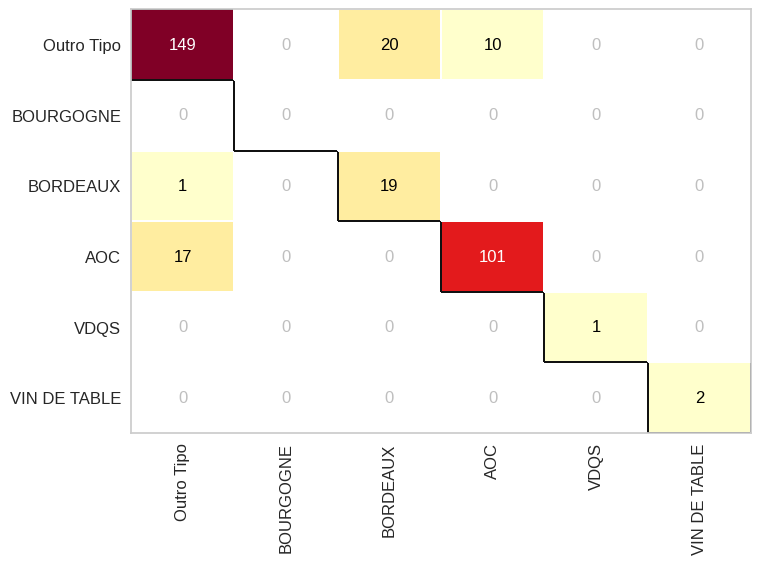

In [32]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    neuronio_nb,
    classes=['Outro Tipo', 'BOURGOGNE', 'BORDEAUX', 'AOC', 'VDQS', 'VIN DE TABLE'],
    label_encoder={ 0: 'Outro Tipo', 1: 'BOURGOGNE', 2: 'BORDEAUX', 3: 'AOC', 4: 'VDQS', 5: 'VIN DE TABLE'},
    )
cm.fit(X_vinho_Treinamento, Y_vinho_treinamento)
cm.score(X_vinho_teste, Y_vinho_teste)

#### Classification Report

In [33]:
print(classification_report(Y_vinho_teste, neuro_predicao))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       179
           2       0.49      0.95      0.64        20
           3       0.91      0.86      0.88       118
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2

    accuracy                           0.85       320
   macro avg       0.86      0.93      0.88       320
weighted avg       0.87      0.85      0.86       320



## Algoritimo de KNN

### Preparativos de base para KNN

In [34]:
import pickle
with open('/content/drive/MyDrive/MAQ5s/Salvos/vinhoTintoProva.pkl', 'rb') as f:
  X_vinho_Treinamento, Y_vinho_treinamento, X_vinho_teste, Y_vinho_teste = pickle.load(f)

In [35]:
X_vinho_Treinamento.shape, X_vinho_teste.shape, Y_vinho_treinamento.shape, Y_vinho_teste.shape

((1279, 12), (320, 12), (1279,), (320,))

### Criação do Neurônio KNN

In [36]:
knn_vinho = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_vinho.fit(X_vinho_Treinamento, Y_vinho_treinamento)

KNeighborsClassifier()

### Realização de predição

In [37]:
previsores_vinho_knn = knn_vinho.predict(X_vinho_teste)
previsores_vinho_knn

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0,
       0, 3, 3, 2, 3, 0, 0, 3, 3, 3, 0, 2, 0, 3, 0, 0, 3, 0, 0, 3, 0, 2,
       3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 2, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0,
       3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 2, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 2, 2, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 2, 0, 0, 2, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 2, 0, 0,
       3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 2, 3,
       0, 0, 3, 2, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0,

### Teste de acurácia

In [38]:
accuracy_score(Y_vinho_teste, previsores_vinho_knn)

0.83125

### Diagnósticos Neuráis

0.83125

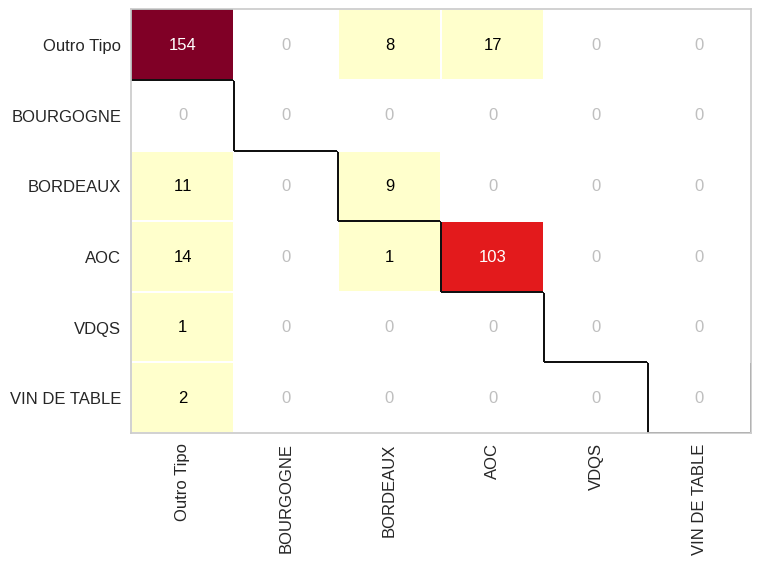

In [40]:
cm = ConfusionMatrix(
    knn_vinho,
    classes=['Outro Tipo', 'BOURGOGNE', 'BORDEAUX', 'AOC', 'VDQS', 'VIN DE TABLE'],
    label_encoder={ 0: 'Outro Tipo', 1: 'BOURGOGNE', 2: 'BORDEAUX', 3: 'AOC', 4: 'VDQS', 5: 'VIN DE TABLE'},
    )
cm.fit(X_vinho_Treinamento, Y_vinho_treinamento)
cm.score(X_vinho_teste, Y_vinho_teste)

### Classification Report

In [41]:
print(classification_report(Y_vinho_teste, previsores_vinho_knn))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       179
           2       0.50      0.45      0.47        20
           3       0.86      0.87      0.87       118
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2

    accuracy                           0.83       320
   macro avg       0.44      0.44      0.44       320
weighted avg       0.82      0.83      0.83       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Algorítimo de regras (CN2 - Regressão)

### Preparativos de base para CN2

In [53]:
base_credit_CN2 = Orange.data.Table('/content/drive/MyDrive/MAQ5s/P2/base_vinho_tintoCategorizado_regra.csv')

In [54]:
base_credit_CN2.domain

[fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality | categoria_classe]

### Separação de Preditores

In [55]:
base_vinho_dividida = Orange.evaluation.testing.sample(base_credit_CN2, n=0.25)

In [56]:
base_vinho_dividida[0], base_vinho_dividida[1]

([[11.5, 0.590, 0.59, 2.60, 0.087, ... | Outros Tipos],
  [7.8, 0.500, 0.12, 1.80, 0.178, ... | AOC],
  [7.4, 0.640, 0.17, 5.40, 0.168, ... | AOC],
  [7.5, 0.500, 0.36, 6.10, 0.071, ... | Outros Tipos],
  [11.0, 0.260, 0.68, 2.55, 0.085, ... | Outros Tipos],
  ...
 ],
 [[7.1, 0.590, 0.01, 2.30, 0.080, ... | Outros Tipos],
  [6.9, 0.630, 0.02, 1.90, 0.078, ... | AOC],
  [11.5, 0.180, 0.51, 4.00, 0.104, ... | Outros Tipos],
  [6.3, 0.470, 0.00, 1.40, 0.055, ... | Outros Tipos],
  [12.6, 0.380, 0.66, 2.60, 0.088, ... | Outros Tipos],
  ...
 ])

In [57]:
base_vinho_treinamento = base_vinho_dividida[1]
base_vinho_teste = base_vinho_dividida[0]

In [59]:
len(base_vinho_treinamento), len(base_vinho_teste)

(1200, 399)

### Neurônio CN2Learner

In [58]:
neuro_orange = Orange.classification.rules.CN2Learner()
neuro_orange_vinho = neuro_orange(base_vinho_treinamento)

### Regras de treinamento

In [60]:
for regras in neuro_orange_vinho.rule_list:
  print(regras)

IF alcohol>=12.1 THEN categoria_classe=Outros Tipos 
IF density>=1.00005 AND alcohol>=9.2 THEN categoria_classe=Outros Tipos 
IF quality>=7.0 AND fixed acidity>=9.9 THEN categoria_classe=Outros Tipos 
IF quality<=4.0 AND volatile acidity>=1.185 THEN categoria_classe=VIN DE TABLE 
IF quality<=4.0 AND volatile acidity>=0.88 THEN categoria_classe=Outros Tipos 
IF quality<=4.0 AND volatile acidity>=0.875 THEN categoria_classe=VIN DE TABLE 
IF alcohol>=10.0 AND density>=0.99501 THEN categoria_classe=Outros Tipos 
IF density>=0.99508 AND quality>=7.0 THEN categoria_classe=Outros Tipos 
IF quality>=8.0 THEN categoria_classe=Outros Tipos 
IF quality>=7.0 THEN categoria_classe=BORDEAUX 
IF quality<=4.0 AND chlorides>=0.2 THEN categoria_classe=VIN DE TABLE 
IF alcohol<=10.0 AND fixed acidity>=13.2 THEN categoria_classe=Outros Tipos 
IF citric acid>=0.5 AND residual sugar>=13.8 THEN categoria_classe=VDQS 
IF quality<=4.0 AND citric acid>=0.66 THEN categoria_classe=VIN DE TABLE 
IF density>=0.9950

### Previsões

In [64]:
previsoes_vinho = Orange.evaluation.testing.TestOnTestData(
    base_vinho_treinamento,
    base_vinho_teste,
     [lambda testdata: neuro_orange_vinho])

In [65]:
previsoes_vinho

### Teste de acurácia

In [67]:
Orange.evaluation.CA(previsoes_vinho)

array([0.98245614])

## TreeMap

### Preparativos de base para TreeMap

In [77]:
with open('/content/drive/MyDrive/MAQ5s/Salvos/vinhoTintoProva.pkl', 'rb') as f:
  X_vinho_Treinamento, Y_vinho_treinamento, X_vinho_teste, Y_vinho_teste = pickle.load(f)

In [70]:
X_vinho_Treinamento.shape, X_vinho_teste.shape, Y_vinho_treinamento.shape, Y_vinho_teste.shape

((1279, 12), (320, 12), (1279,), (320,))

### Criação do Neurônio TreeMap

In [71]:
treemap_vinho = DecisionTreeClassifier(criterion='entropy', random_state=0)
treemap_vinho.fit(X_vinho_Treinamento, Y_vinho_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Previsores

In [72]:
previsores_treemap = treemap_vinho.predict(X_vinho_teste)
previsores_treemap

array([0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 3, 0, 3,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 3, 3, 0, 3, 3,
       0, 0, 3, 2, 3, 0, 0, 3, 3, 0, 0, 2, 0, 3, 2, 3, 3, 0, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 3, 0,
       3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 5, 3, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 3, 3,
       2, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 3, 2, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 4, 3, 3, 2, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 2, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,

### Teste de Acurácia

In [74]:
accuracy_score(Y_vinho_teste, previsores_treemap)

0.996875

### Classification report

0.996875

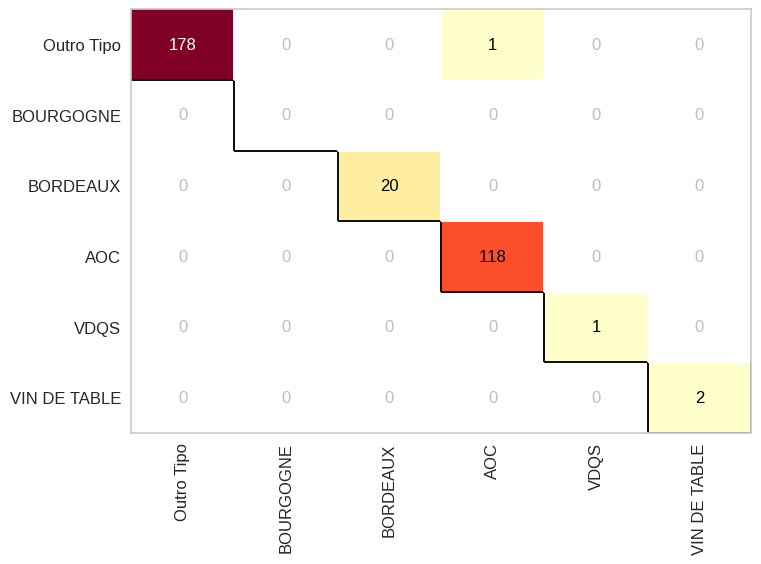

In [85]:
cm_tm = ConfusionMatrix(
    treemap_vinho,
    classes=['Outro Tipo', 'BOURGOGNE', 'BORDEAUX', 'AOC', 'VDQS', 'VIN DE TABLE'],
    label_encoder={ 0: 'Outro Tipo', 1: 'BOURGOGNE', 2: 'BORDEAUX', 3: 'AOC', 4: 'VDQS', 5: 'VIN DE TABLE'},
    )
cm_tm.fit(X_vinho_Treinamento, Y_vinho_treinamento)
cm_tm.score(X_vinho_teste, Y_vinho_teste)

## Random Florest

### Preparativos de base para Random Florest

In [78]:
with open('/content/drive/MyDrive/MAQ5s/Salvos/vinhoTintoProva.pkl', 'rb') as f:
  X_vinho_Treinamento, Y_vinho_treinamento, X_vinho_teste, Y_vinho_teste = pickle.load(f)

In [79]:
X_vinho_Treinamento.shape, X_vinho_teste.shape, Y_vinho_treinamento.shape, Y_vinho_teste.shape

((1279, 12), (320, 12), (1279,), (320,))

### Criação do Neurônio Random Florest Classifier

In [80]:
RF_vinho = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
RF_vinho.fit(X_vinho_Treinamento, Y_vinho_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [81]:
previsores_RFC = RF_vinho.predict(X_vinho_teste)
previsores_RFC

array([0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 3, 0, 3,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 3, 0, 0, 3, 3,
       0, 0, 3, 2, 3, 0, 0, 3, 3, 3, 0, 2, 0, 3, 2, 0, 3, 0, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 3, 0,
       3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 5, 3, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 3, 3,
       2, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 3, 3, 2, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 4, 3, 3, 2, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 2, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,

### Teste de acurácia

In [82]:
accuracy_score(Y_vinho_teste, previsores_RFC)

0.984375

### Classification report

0.984375

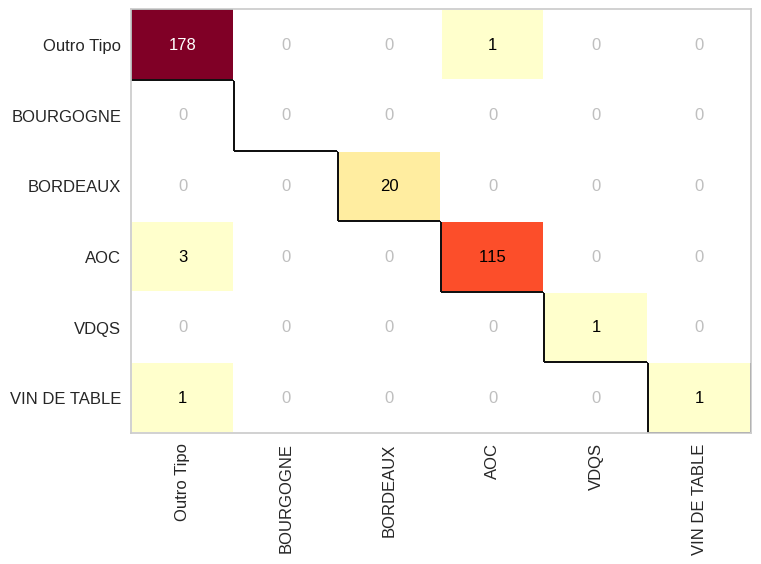

In [87]:
cm_RFC = ConfusionMatrix(
    RF_vinho,
    classes=['Outro Tipo', 'BOURGOGNE', 'BORDEAUX', 'AOC', 'VDQS', 'VIN DE TABLE'],
    label_encoder={ 0: 'Outro Tipo', 1: 'BOURGOGNE', 2: 'BORDEAUX', 3: 'AOC', 4: 'VDQS', 5: 'VIN DE TABLE'},
    )
cm_RFC.fit(X_vinho_Treinamento, Y_vinho_treinamento)
cm_RFC.score(X_vinho_teste, Y_vinho_teste)

# Resultados

## Gráfico comparativo entre a acurrácia de todos os modelos

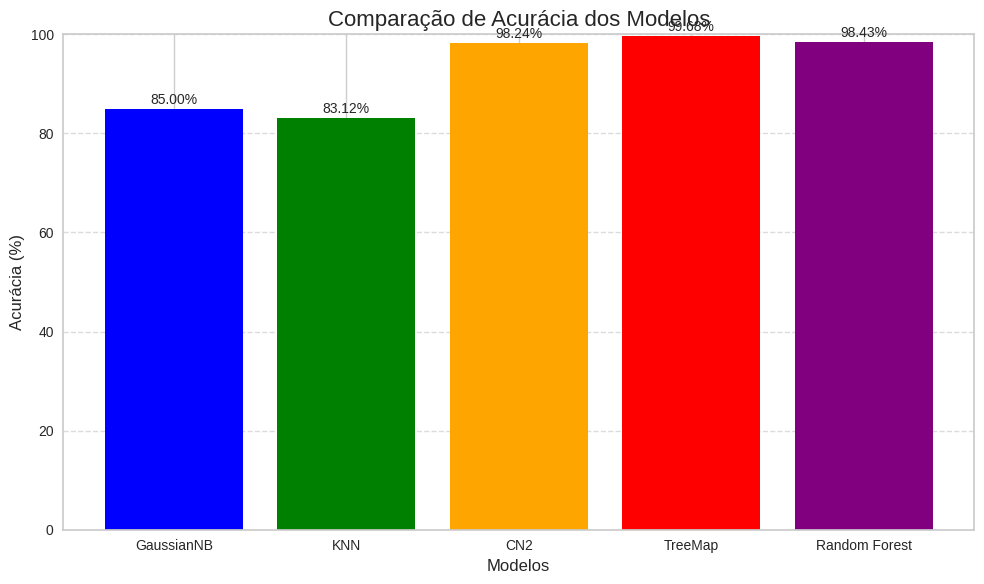

In [89]:
modelos = ["GaussianNB", "KNN", "CN2", "TreeMap", "Random Forest"]
acuracias = [85, 83.12, 98.24, 99.68, 98.43]

plt.figure(figsize=(10, 6))
plt.bar(modelos, acuracias, color=['blue', 'green', 'orange', 'red', 'purple'])

plt.title("Comparação de Acurácia dos Modelos", fontsize=16)
plt.xlabel("Modelos", fontsize=12)
plt.ylabel("Acurácia (%)", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, acc in enumerate(acuracias):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=10)


plt.tight_layout()
plt.show()

## Considerações

O resultado da utilização de diferentes tipos de algorímos destaca a de cada um deles para esta base de dados, sendo que, o algorítimo que teve melhor acurácia foi o TreeMap que resultou em 99,68% de precisão.

Vale destacar que os algorítimos CN2 e random florest também tiveram um ótimo desempenho e podêm auxiliar nas respostas ao serem integrados a um agente.

A base de dados não foi tão eficiente na utilização do GaussianNB e no KNN porém o resultado apresentado, embora tenha precisão inferior aos outros também são relevantes, pois os mesmos tiveram mais de 80% de acertividade.